<a href="https://colab.research.google.com/github/ever07/smokingdata/blob/main/Limpieza%20de%20datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Limpieza de Datos**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/ever07/smokingdata/refs/heads/main/smoking_data.csv')

In [3]:
#Un vistazo rápido a los datos
print(data.shape)
data.head()

(150, 12)


,Country,Year,Total Smokers (Millions),Smoking Prevalence (%),Male Smokers (%),Female Smokers (%),Cigarette Consumption (Billion Units),Top Cigarette Brand in Country,Brand Market Share (%),Smoking-Related Deaths,Tobacco Tax Rate (%),Smoking Ban Policy
0,South Africa,2010,279.6,21.5,13.3,8.2,2415.7,Peter Stuyvesant,21.3,461574,32.9,Partial
1,South Africa,2022,41.8,10.2,7.5,2.7,97.0,Peter Stuyvesant,46.6,57945,42.9,Comprehensive
2,South Africa,2017,262.0,30.7,22.1,8.6,161.5,Peter Stuyvesant,58.5,407834,51.4,Partial
3,Germany,2016,11.3,38.2,24.1,14.1,111.5,Marlboro,15.9,13142,79.6,Partial
4,Brazil,2014,241.9,27.6,18.2,9.4,2151.2,Derby,59.9,220450,56.4,NaN


In [4]:
#Información del conjunto de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country                                150 non-null    object 
 1   Year                                   150 non-null    int64  
 2   Total Smokers (Millions)               150 non-null    float64
 3   Smoking Prevalence (%)                 150 non-null    float64
 4   Male Smokers (%)                       150 non-null    float64
 5   Female Smokers (%)                     150 non-null    float64
 6   Cigarette Consumption (Billion Units)  150 non-null    float64
 7   Top Cigarette Brand in Country         150 non-null    object 
 8   Brand Market Share (%)                 150 non-null    float64
 9   Smoking-Related Deaths                 150 non-null    int64  
 10  Tobacco Tax Rate (%)                   150 non-null    float64
 11  Smokin

In [5]:
#No existen valores duplicados
data.duplicated().sum()

np.int64(0)

**Tratamiento de valores faltantes**  
La columna Smoking Ban Policy tiene un total de 48 valores que son tomados como nulos, por ser una cantidad considerable para el total de filas no se eliminaran si no que se imputara con un valor predeterminado

In [6]:
data.isnull().sum()

,0
Country,0
Year,0
Total Smokers (Millions),0
Smoking Prevalence (%),0
Male Smokers (%),0
Female Smokers (%),0
Cigarette Consumption (Billion Units),0
Top Cigarette Brand in Country,0
Brand Market Share (%),0
Smoking-Related Deaths,0


In [7]:
data.fillna("ninguna", inplace=True)
data.isnull().sum()

,0
Country,0
Year,0
Total Smokers (Millions),0
Smoking Prevalence (%),0
Male Smokers (%),0
Female Smokers (%),0
Cigarette Consumption (Billion Units),0
Top Cigarette Brand in Country,0
Brand Market Share (%),0
Smoking-Related Deaths,0


In [8]:
data.head()

,Country,Year,Total Smokers (Millions),Smoking Prevalence (%),Male Smokers (%),Female Smokers (%),Cigarette Consumption (Billion Units),Top Cigarette Brand in Country,Brand Market Share (%),Smoking-Related Deaths,Tobacco Tax Rate (%),Smoking Ban Policy
0,South Africa,2010,279.6,21.5,13.3,8.2,2415.7,Peter Stuyvesant,21.3,461574,32.9,Partial
1,South Africa,2022,41.8,10.2,7.5,2.7,97.0,Peter Stuyvesant,46.6,57945,42.9,Comprehensive
2,South Africa,2017,262.0,30.7,22.1,8.6,161.5,Peter Stuyvesant,58.5,407834,51.4,Partial
3,Germany,2016,11.3,38.2,24.1,14.1,111.5,Marlboro,15.9,13142,79.6,Partial
4,Brazil,2014,241.9,27.6,18.2,9.4,2151.2,Derby,59.9,220450,56.4,ninguna


**Información de las columnas numericas**

In [9]:
data.describe()

,Year,Total Smokers (Millions),Smoking Prevalence (%),Male Smokers (%),Female Smokers (%),Cigarette Consumption (Billion Units),Brand Market Share (%),Smoking-Related Deaths,Tobacco Tax Rate (%)
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2018.066667,170.466000,23.387333,17.719333,5.668000,927.815333,33.956667,224419.926667,57.835333
std,4.389840,100.806168,9.697494,8.204800,2.844335,773.890041,14.643969,160056.395740,17.996011
min,2010.000000,2.700000,5.900000,3.800000,0.900000,4.300000,10.100000,4452.000000,30.100000
25%,2014.000000,86.225000,15.600000,11.725000,3.400000,290.850000,20.550000,84614.750000,42.350000
50%,2018.000000,165.000000,22.800000,16.900000,5.000000,753.050000,33.300000,190765.500000,55.250000
75%,2022.000000,256.625000,31.000000,23.725000,7.500000,1358.475000,45.775000,349719.000000,75.000000
max,2024.000000,344.100000,39.900000,34.200000,15.200000,3238.600000,59.900000,606058.000000,89.800000


**Busqueda de valores atipicos en variables numericas**

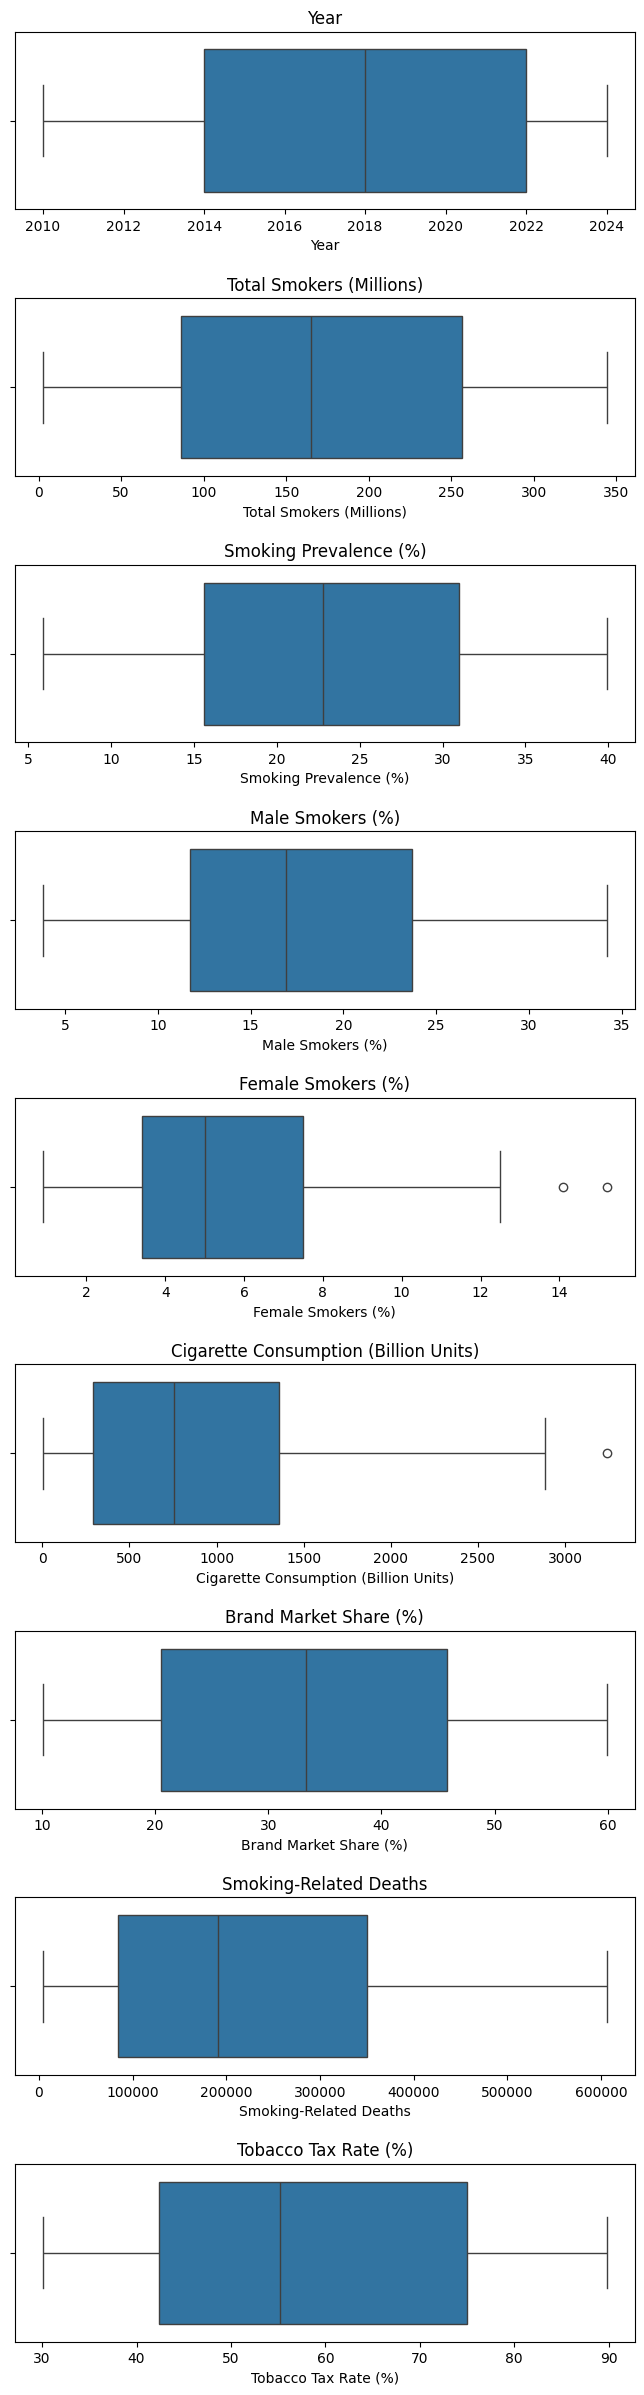

In [ ]:
cols_num = ['Year', 'Total Smokers (Millions)', 'Smoking Prevalence (%)', 'Male Smokers (%)',
            'Female Smokers (%)', 'Cigarette Consumption (Billion Units)', 'Brand Market Share (%)',
            'Smoking-Related Deaths', 'Tobacco Tax Rate (%)']

fig, ax = plt.subplots(nrows=9, ncols=1, figsize=(8, 30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
  sns.boxplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)

**Busqueda de errores tipograficos en variables categoricas**  
como resultado podemos observar que todos los valores estan escritos correctamente,
no hay duplicados por mala escritura

In [16]:
#cols_cat = ['Country', 'Top Cigarette Brand in Country', 'Smoking Ban Policy']

#fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 20))
#fig.subplots_adjust(hspace=0.5)

#for i, col in enumerate(cols_cat):
#   sns.countplot(x=col, data=data, ax=ax[i])
#  ax[i].set_title(col)
#  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)

print(data['Country'].unique())
print(data['Top Cigarette Brand in Country'].unique())
print(data['Smoking Ban Policy'].unique())

['South Africa' 'Germany' 'Brazil' 'South Korea' 'UK' 'Canada' 'Vietnam'
 'Italy' 'India' 'China' 'Mexico' 'Spain' 'Russia' 'Thailand' 'Australia'
 'Turkey' 'Japan' 'Indonesia' 'USA' 'France']
['Peter Stuyvesant' 'Marlboro' 'Derby' 'Esse' 'Du Maurier' 'Vinataba' 'MS'
 'Gold Flake' 'China National Tobacco Corp.' 'Fortuna' 'Sobranie' 'Wonder'
 'Winfield' 'Tekel' 'Mevius' 'Gudang Garam' 'Gauloises']
['Partial' 'Comprehensive' 'ninguna']


En conclusión el set de datos ha sido analizado para encontrar anomalías y este mismo ya se encuentra en condiciones para su analisis exploratorio.  
Se procede a exportarlo:

In [19]:
data.to_csv('smoking_data_clean.csv', index=False)